In [1]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

In [2]:
data = pd.read_csv("No_Duplicate_Japan_Articles.csv")
data.head()

,Date,Headline,Articles
0,"May 4, 2020",New Zealand's 'Nomads' in Australia for rugby ...,['Sydney – They\'re being dubbed the New Zeala...
1,"May 4, 2020",Governor moves to get Osaka back in business b...,['OSAKA – As the central government prepares t...
2,"May 4, 2020",Japan school closures reignite debate on shift...,['After sudden shutdowns and a scramble to tea...
3,"May 4, 2020",Japan's seniors trapped between infection and ...,['As Japan prepares for at least another month...
4,"May 4, 2020",New Zealand and Australia consider coronavirus...,['SYDNEY/WELLINGTON – New Zealand and Australi...


In [3]:
# top2vec = Top2Vec(documents=data.Articles, speed="deep-learn", workers=4)

In [4]:
# top2vec.save("Japan_Covid-19_Top2Vec_model")

In [3]:
top2vec = Top2Vec.load("Japan_Covid-19_Top2Vec_model")

In [4]:
top2vec.get_num_topics()

255

In [5]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()
print(topic_sizes)
print("-----------------")
print(topic_nums)

[409 382 363 314 293 259 258 251 241 240 233 215 196 189 182 178 177 177
 177 175 175 173 167 165 165 164 163 158 146 145 138 136 134 134 134 133
 133 132 131 129 127 126 125 119 118 117 116 115 113 112 111 110 110 108
 108 106 104 103 102 101 101 100 100 100  99  99  99  98  98  96  95  94
  93  93  93  92  90  88  88  87  87  87  86  86  86  85  85  84  84  83
  83  83  83  82  82  81  81  80  79  78  78  78  77  77  77  76  75  75
  75  74  74  74  73  72  72  72  72  72  72  71  70  69  68  67  67  67
  66  66  66  65  64  64  64  63  62  62  62  61  61  60  59  58  57  57
  57  57  56  55  55  54  54  53  53  53  53  53  53  53  52  52  50  50
  50  50  49  49  49  48  48  48  48  48  47  46  46  46  46  45  45  45
  45  45  45  45  45  44  43  43  43  42  42  41  41  41  40  40  40  40
  40  40  39  39  39  39  38  38  38  37  37  36  36  35  35  35  35  35
  35  34  34  34  34  34  34  33  33  32  32  32  32  31  31  31  30  30
  30  30  30  28  27  26  26  25  25  25  24  24  2

In [6]:
topic_words, word_scores, topic_nums = top2vec.get_topics(255)
print(topic_words)

[['investors' 'stocks' 'dow' ... 'worries' 'expectations' 'fell']
 ['decliners' 'section' 'shares' ... 'expectations' 'yutaka' 'sumitomo']
 ['ioc' 'bach' 'olympics' ... 'postponed' 'qualifiers' 'host']
 ...
 ['soviet' 'treaty' 'putin' ... 'abduction' 'wartime' 'intention']
 ['macao' 'nepal' 'sri' ... 'handout' 'earners' 'exam']
 ['averaged' 'altogether' 'mainichi' ... 'rescheduled' 'oxygenation'
  'august']]


In [7]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["eiju"], num_topics=1)
print(topic_words)
print("----------")
print(word_scores)
print("----------")
print(topic_scores)
print("----------")
print(topic_nums)
print("----------")

[array(['eiju', 'inpatients', 'outpatients', 'taito', 'man', 'hospital',
       'admitted', 'woman', 'hospitalized', 'outpatient', 'discharged',
       'fever', 'ward', 'suspected', 'cluster', 'sore', 'symptoms',
       'patient', 'institution', 'mainichi', 'nara', 'underwent',
       'kitakyushu', 'facility', 'prefectural', 'occurred', 'infected',
       'nurse', 'saitama', 'kanagawa', 'examination', 'suspect',
       'prefecture', 'male', 'jan', 'polymerase', 'yamanashi',
       'condition', 'chuo', 'municipal', 'hyogo', 'driver', 'doctor',
       'examined', 'pneumonia', 'xa', 'aichi', 'positive', 'chiba', 'ct'],
      dtype='<U15')]
----------
[array([0.4766, 0.4719, 0.4168, 0.4   , 0.3711, 0.3415, 0.3152, 0.3109,
       0.3102, 0.3081, 0.3068, 0.3042, 0.3019, 0.3019, 0.2984, 0.2971,
       0.2949, 0.2898, 0.2898, 0.2893, 0.2887, 0.2865, 0.2861, 0.28  ,
       0.2774, 0.2737, 0.2728, 0.2716, 0.2694, 0.2666, 0.265 , 0.2611,
       0.2609, 0.2603, 0.2572, 0.2562, 0.256 , 0.2526, 0.25

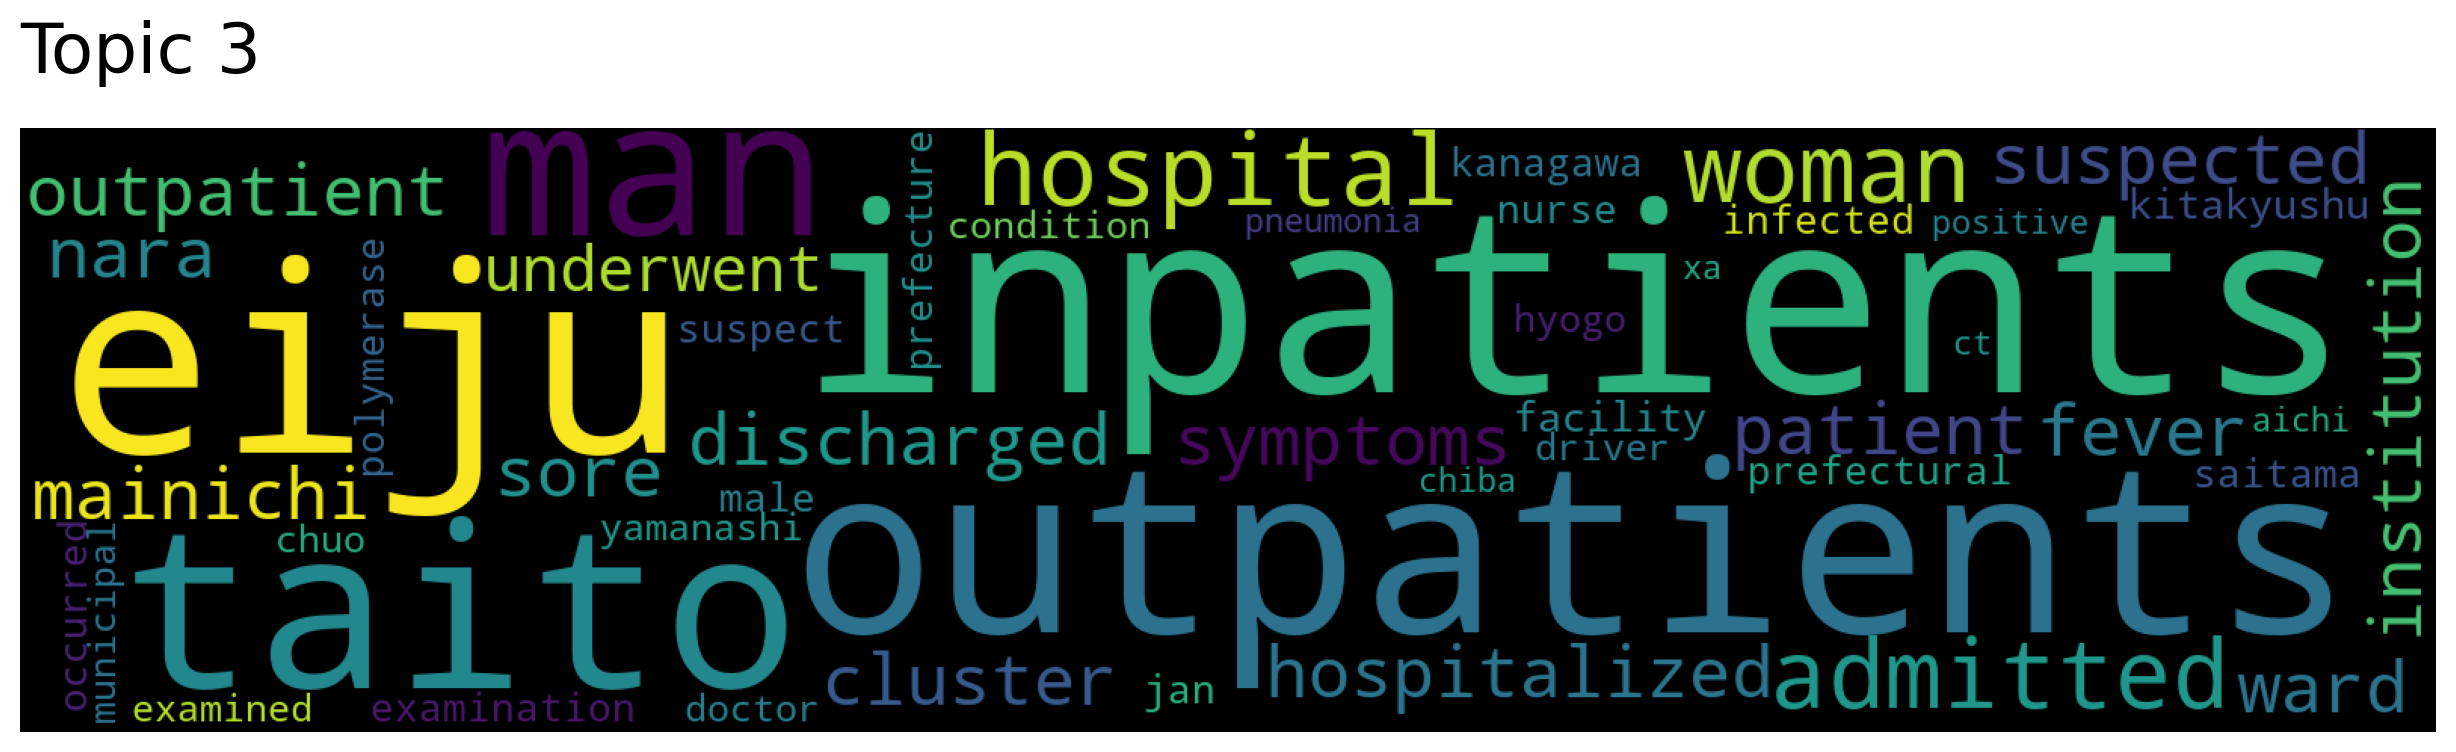

In [10]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["eiju"], num_topics=1)
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)

In [27]:
documents, document_scores, document_ids = top2vec.search_documents_by_topic(topic_num=9, num_docs=15)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8593, Score: 0.6244532465934753
-----------
["\r\n    TOKYO (Kyodo) -- Japan's education ministry presented Friday the option of schools reopening for some grades only to reduce the risk of coronavirus infections, with priority given to classes for first- and sixth-graders at elementary schools as well as senior students at junior high schools.\r\n", '\n', '\r\n    The proposal was made to local education boards. Most schools across Japan have been closed since early March amid the spread of the virus.\r\n', '\n', '\r\n    Elementary school first- and sixth-graders as well as senior students at junior high will be prioritized because they have either just entered school in April, are in their final year or have to prepare for entrance exams next year.\r\n', '\n', '\r\n    The suggestion follows a meeting between the education ministry and a government panel of experts on Monday.\r\n', '\n', '\r\n    The ministry also proposed holding classes in smaller groups using several cl

In [ ]:
documents, document_scores, document_ids = top2vec.search_documents_by_keywords(keywords=["Shinzo", "Abe"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

In [ ]:
words, word_scores = top2vec.similar_words(keywords=["Syria"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")